In [44]:
import diamon_read_data as dia
import influx_data_query as idb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pickle
import plotting as p
import importlib
import pytz
import diamon_analysis as da
from influx_data_utils.process_influx_data.datetime_localiser import \
    DatetimeLocaliser
import main
importlib.reload(idb)
importlib.reload(da)
importlib.reload(p)
importlib.reload(da)
ts2_path = r"C:\Users\sfs81547\OneDrive - Science and Technology Facilities Council\Documents\ISIS\Diamon Project\TS2 Measurements\DIAMON*"
location_path = r"C:\Users\sfs81547\OneDrive - Science and Technology Facilities Council\Documents\ISIS\Diamon Project\Code\data\Measurement_location.csv"
fname = "shutters_pickle.pkl"

In [43]:
shutters = da.load_pickle(fname)

data = dia.read_diamon_folders(ts2_path, location_path)
beam_data = {name: da.filter_shutters(dic, shutters) for name, dic in data.items()}
beam_df = da.convert_to_df(beam_data)

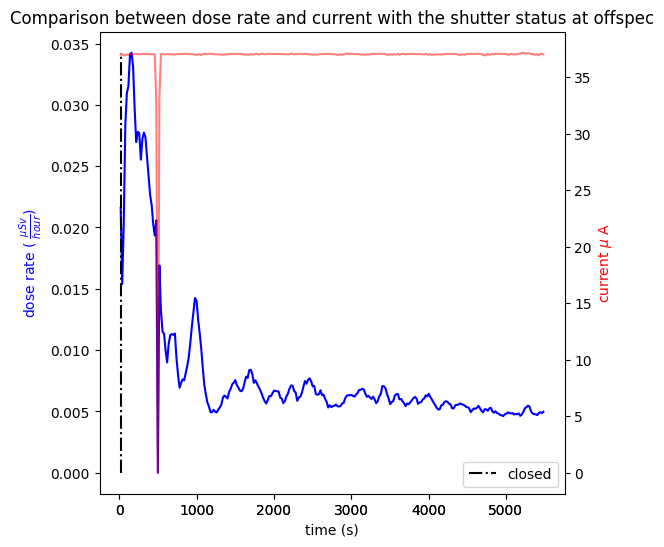

In [53]:
def plot_dose_time(data):
    df = data["out"]["shutter-status"]
    m = (df.ne(df.shift()))
    change_times = data["out"][m]


    x = data['out']['t(s)']
    y = data['out']['norm_dose']
    y2 = data['out']['ts2_current']
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax2 = fig.add_subplot(111, frame_on=False)
    ax.plot(x, y, color='b', marker=None)
    ax.set_xlabel("time (s)")
    ax.set_ylabel(r"dose rate ( $\frac{\mu Sv}{hour})$", color='b')
    colors = ['black', 'orange', 'green']
    for time, status in zip(change_times["t(s)"], change_times["shutter-status"]):
        if str(status) == '1.0':
            color = colors[2]
            label = "open"
        elif str(status) == '2.0':
            color = colors[0]
            label= "closed"
        elif str(status) == '3.0':
            color = colors[1]
            label = 'setup'
        plt.vlines(time, 0, max(y2), ls='dashdot', color=color, label=label)
    ax2.plot(x, y2, color='r', marker=None, alpha=0.5)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('current $\mu$ A', color='r') 
    ax2.yaxis.set_label_position('right')

    plt.legend(loc="lower right")
    plt.title("Comparison between dose rate and current for the beamline " + da.get_names(data["reference"])[1])
plot_dose_time(data["DIAMON-02_30.11.1"])

Text(0.5, 1.0, 'Comparison between dose rate and current with the shutter status at nimrod')

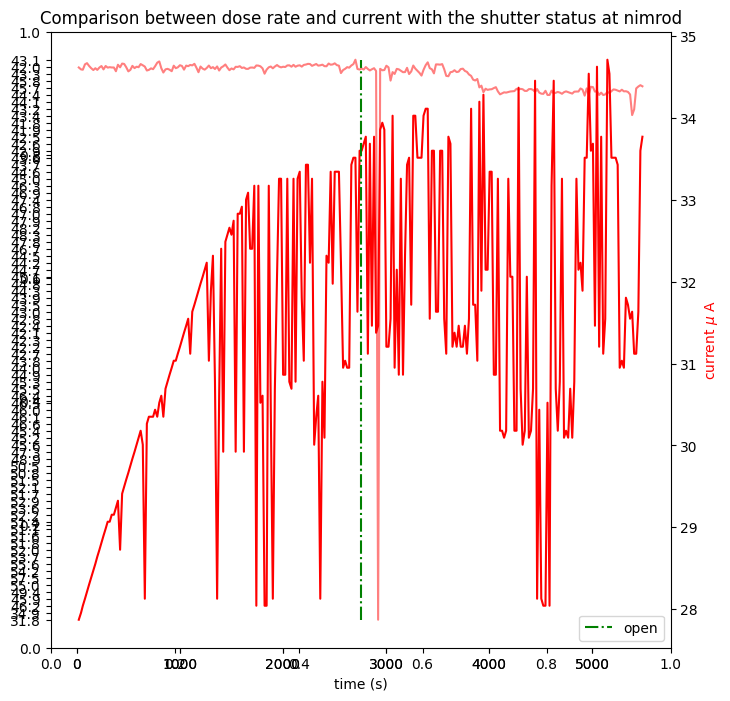

In [385]:
import matplotlib.pyplot as plt

#get starting status then record change in difference
#todo: generalise for all measurements?
df = filtered_d["DIAMON-01_16.11.1"]["out"]["shutter-status"]
m = (df.ne(df.shift()))
change_times = filtered_d["DIAMON-01_16.11.1"]["out"][m]


x = filtered_d["DIAMON-01_16.11.1"]['out']['t(s)']
y = filtered_d["DIAMON-01_16.11.1"]['out']['norm_dose']
#y = filtered_d["DIAMON-01_16.11.2"]['out']['H*(10)r']
y2 = filtered_d["DIAMON-01_16.11.1"]['out']['current']
fig = plt.figure(figsize=(8,8))
#ax = bar(x, y, yerr=filtered_d["DIAMON-01_01.12.3"]['out']['Hi_un%'])
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111, frame_on=False)
ax3 = fig.add_subplot(111, frame_on=False)
ax4 = fig.add_subplot(111, frame_on=False)
ax5 = fig.add_subplot(111, frame_on=False)
#ax.plot(x, y, color='b', marker=None)
#ax.plot(x, filtered_d["DIAMON-01_10.11.1"]['out']['H*(10)r'], color='g', marker=None)
ax.set_xlabel("time (s)")
#ax.set_ylabel(r"dose rate ( $\frac{\mu Sv}{hour})$", color='b')
colors = ['black', 'orange', 'green']
for time, status in zip(change_times["t(s)"], change_times["shutter-status"]):
    if str(status) == '1.0':
        color = colors[2]
        label = "open"
    elif str(status) == '2.0':
        color = colors[0]
        label= "closed"
    elif str(status) == '3.0':
        color = colors[1]
        label = 'setup'
    plt.vlines(time, 0, max(y2), ls='dashdot', color=color, label=label)
ax2.plot(x, y2, color='r', marker=None, alpha=0.5)
ax2.yaxis.tick_right()
ax2.set_ylabel('current $\mu$ A', color='r') 
ax2.yaxis.set_label_position('right')

ax3.plot(x, filtered_d["DIAMON-01_16.11.1"]['out']['Fast%'], color='r')
ax3.plot(x, filtered_d["DIAMON-01_16.11.1"]['out']['Epit%'], color='b')
ax3.plot(x, filtered_d["DIAMON-01_16.11.1"]['out']['Ther%'], color='green')

ax4.axis('off')
ax5.axis('off')
plt.legend(loc="lower right")
plt.title("Comparison between dose rate and current with the shutter status at nimrod")

In [384]:
filtered_d["DIAMON-01_16.11.1"]['out']

,t(s),H*(10)r,Hr_un%,H*(10)i,Hi_un%,h*(10),h_un%,PHI,phi_un%,D_UNC,Ther%,Epit%,Fast%,INTERNAL,datetime,norm_dose,shutter-status,current
0,19.70,0.603,78.3,0.003,78.3,84.4,20.5,1.983,75.5,59.10,16.1,52.1,31.8,[1-0.43 0],2022-11-16 10:17:55.700,0.017418,1.0,34.618489
1,41.65,0.553,76.2,0.006,76.2,87.2,20.8,1.763,73.4,44.39,13.0,52.1,34.9,[1-0.43 0],2022-11-16 10:18:17.650,0.015985,1.0,34.594460
2,58.98,1.007,52.5,0.016,52.5,124.0,15.5,2.254,50.1,34.43,10.8,43.0,46.2,[1-0.43 0],2022-11-16 10:18:34.980,0.029112,1.0,34.591080
3,79.80,0.987,48.6,0.022,48.6,127.8,13.3,2.145,46.7,30.13,10.1,44.0,45.9,[1-0.43 0],2022-11-16 10:18:55.800,0.028479,1.0,34.656614
4,99.49,1.086,43.3,0.030,43.3,135.3,12.7,2.229,41.3,26.95,8.8,41.8,49.4,[1-0.43 0],2022-11-16 10:19:15.490,0.031323,1.0,34.671149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,5405.84,1.467,9.5,2.203,9.5,164.6,8.7,2.476,3.9,3.30,11.8,45.5,42.7,[1-0.35 2],2022-11-16 11:47:41.840,0.043013,1.0,34.106310
270,5425.56,1.471,10.1,2.218,10.1,164.6,9.3,2.483,3.9,3.29,11.8,45.5,42.7,[1-0.39 2],2022-11-16 11:48:01.560,0.042809,1.0,34.362053
271,5446.45,1.469,10.8,2.223,10.8,164.3,10.0,2.484,3.9,3.29,11.8,45.2,43.0,[1-0.40 2],2022-11-16 11:48:22.450,0.042721,1.0,34.385757
272,5466.16,1.485,10.5,2.254,10.5,165.6,9.8,2.491,3.9,3.28,11.8,45.3,42.9,[1-0.42 2],2022-11-16 11:48:42.160,0.043166,1.0,34.401897


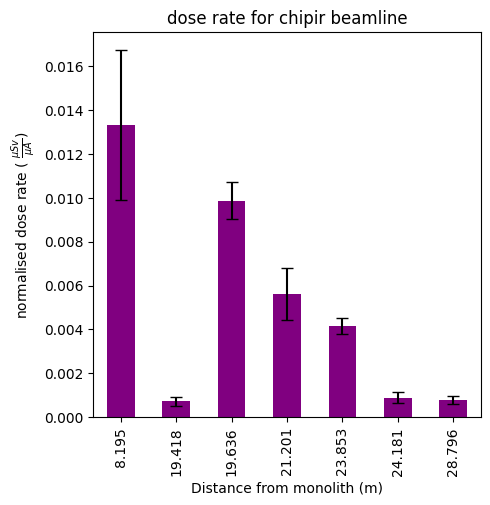

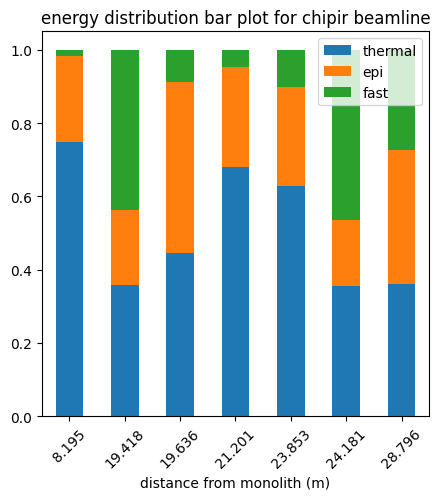

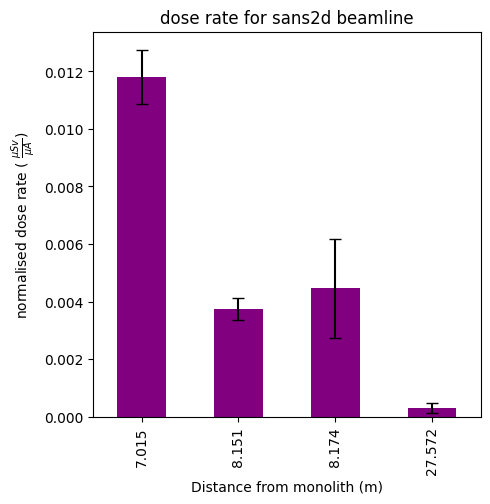

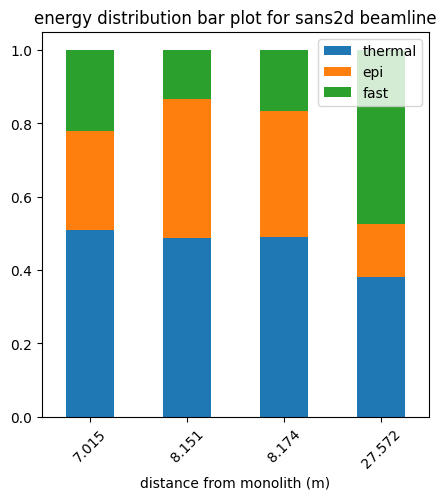

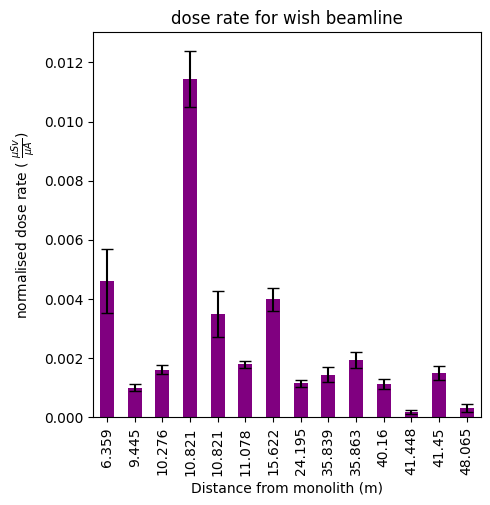

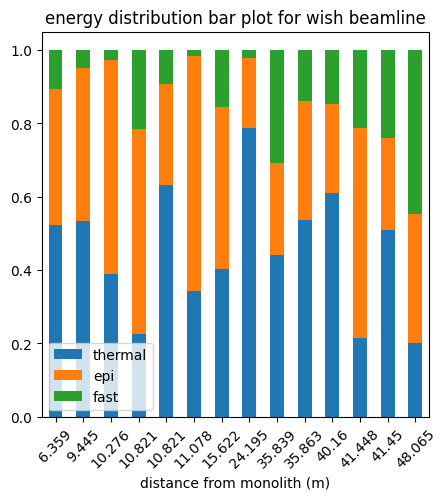

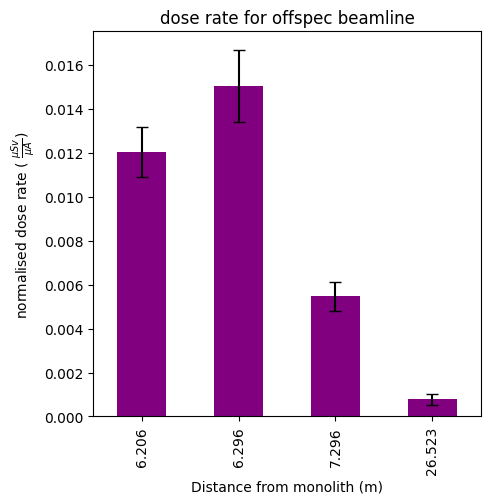

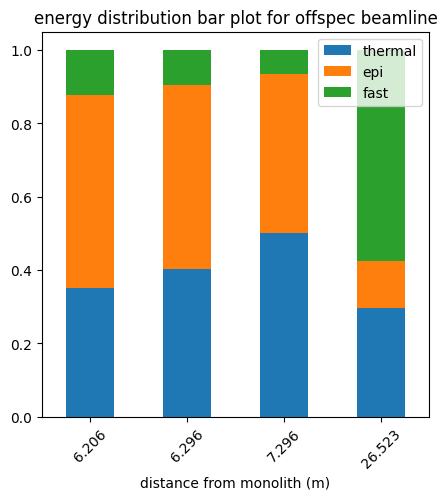

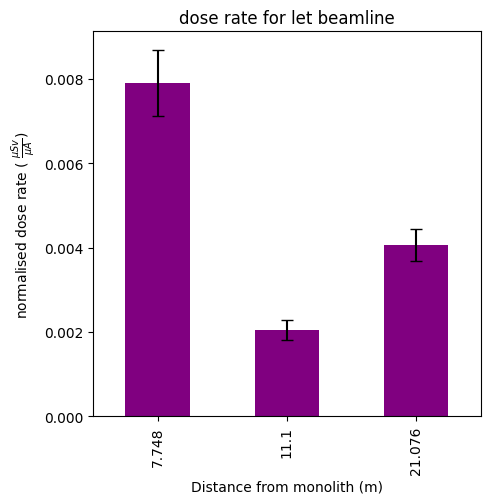

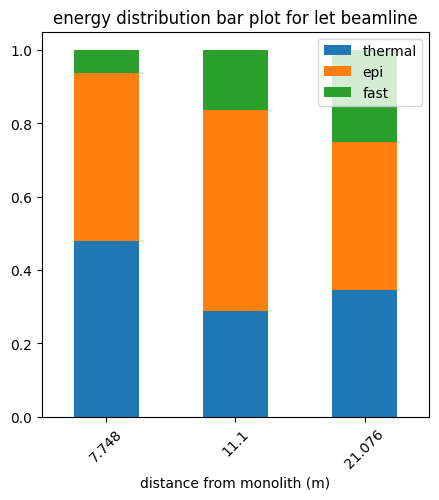

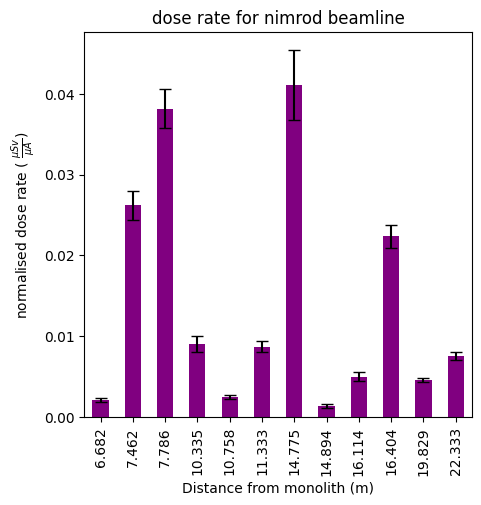

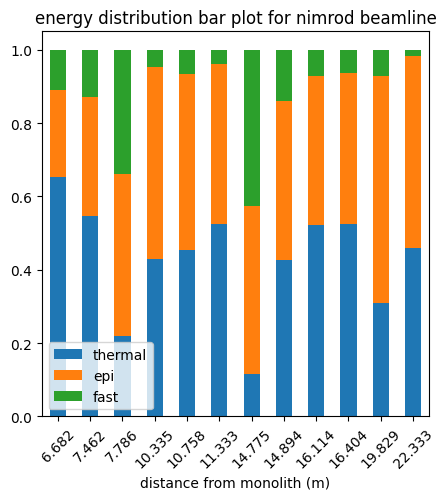

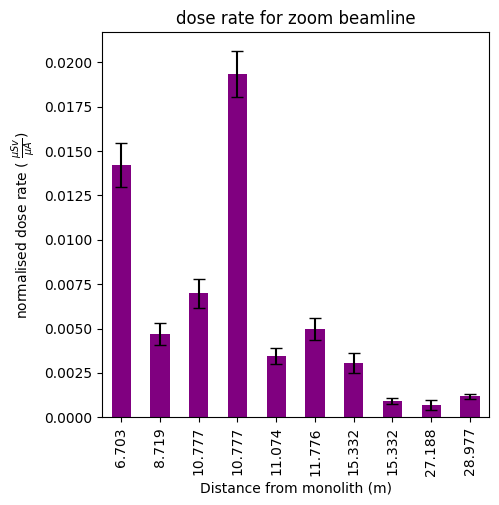

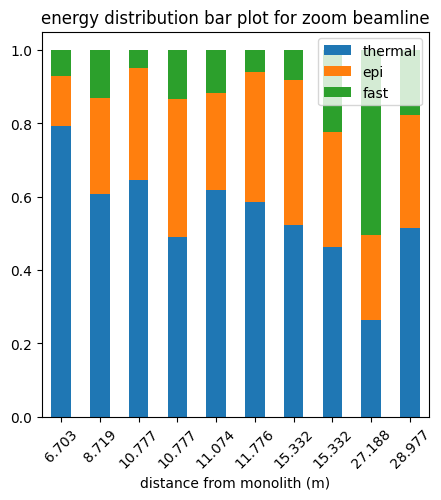

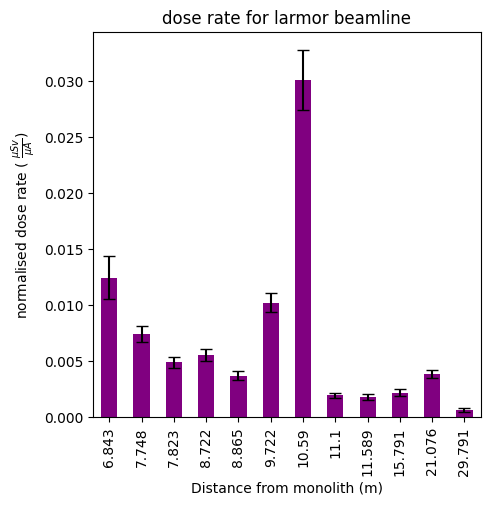

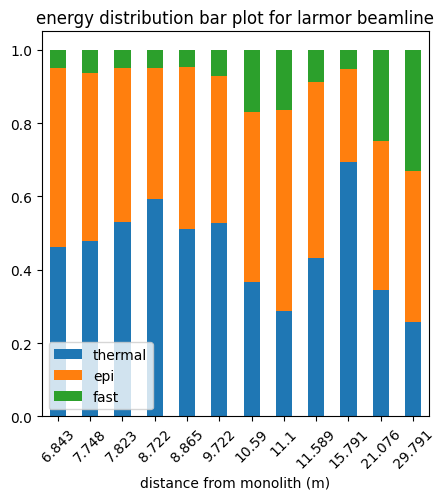

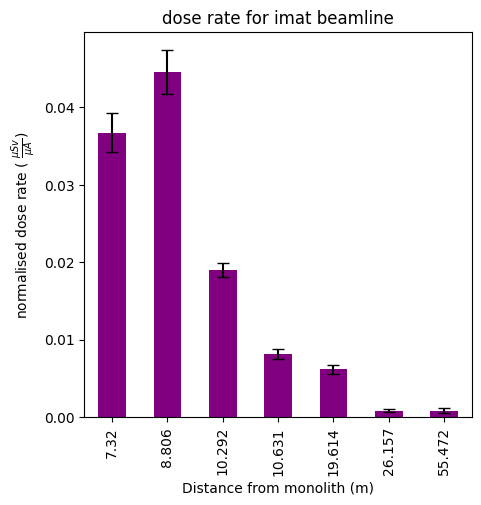

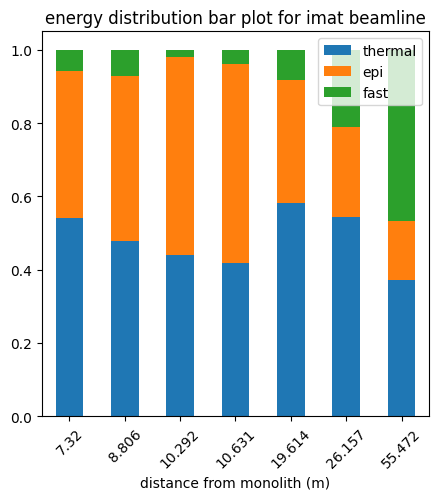

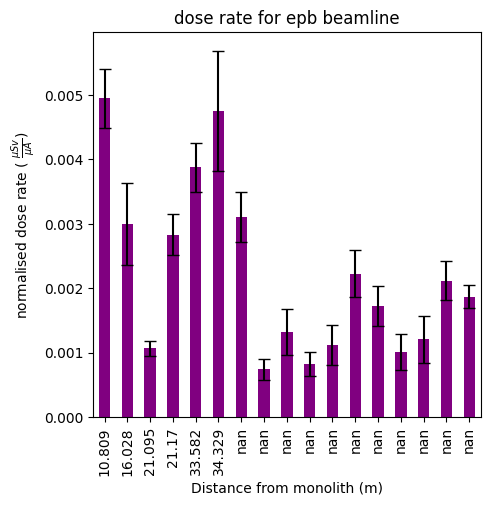

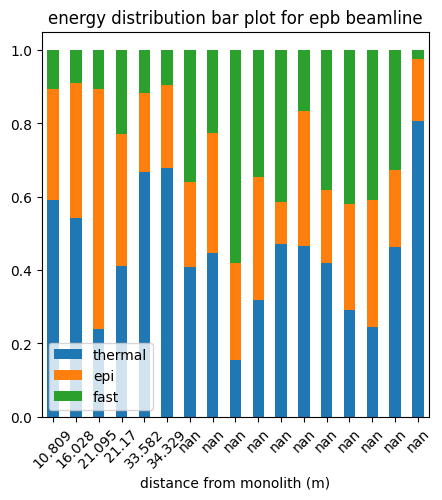

In [354]:
#plots - NEED ORDER THESE by distance away
importlib.reload(da)
importlib.reload(p)
for key, beamline in beam_df.items():
    if not beamline.empty:
        #p.plot_dose_distance(beamline, key)
        #p.plot_combined_spect(beamline, key)
        p.plot_dose_rate(beamline, key)
        #p.direction_bar_plot(beamline, key)
        p.stack_bar_plot(beamline, key=key)


In [348]:
from functools import reduce
x = []
y  = []
dose = []
for name, beam_data in beam_df.items():
    if not beam_data.empty:
        beam_data = beam_data.dropna()
        x.append(beam_data["x"])
        y.append(beam_data['y'])
        dose.append(beam_data["norm_dose_rate"])
nx = [element for innterlist in x for element in innterlist]
ny = [element for innterlist in y for element in innterlist]
ndose = [element for innterlist in dose for element in innterlist]
df = pd.DataFrame({'x': nx, 'y': ny, "dose":ndose})
df.query('dose == dose.max()')


,x,y,dose
67,-0.472754,-8.793,0.044556


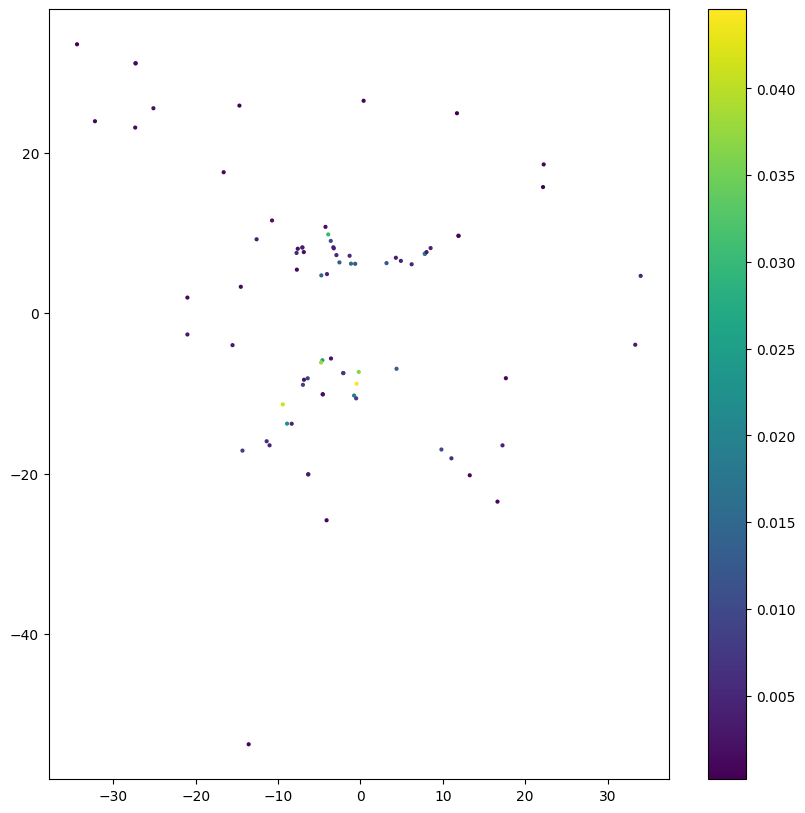

In [349]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
scat = ax.scatter(nx, ny, c=ndose, s=4)
fig.colorbar(scat)

C:\Users\sfs81547\AppData\Local\Temp\ipykernel_18748\2684452946.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


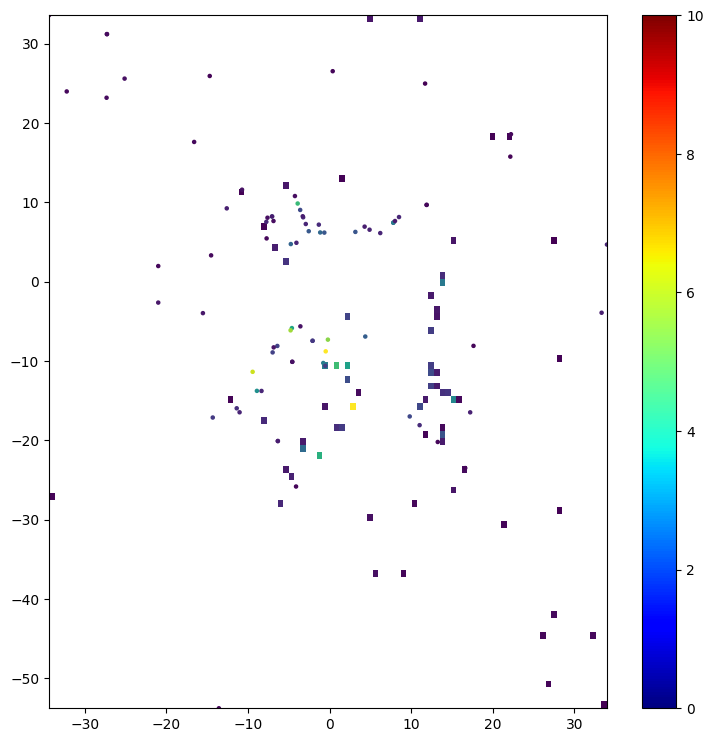

In [350]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
def plot():
    f = plt.figure(figsize=(9,9))
    ax = f.add_subplot(111)
    map, x_edge, y_edge = np.histogram2d(df['x'], df['y'], bins = (100,100), weights=df['dose'], normed=False)
    #map = gaussian_filter(map, sigma=1)
    extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
    map = np.ma.masked_equal(map, 0)
    #map = gaussian_filter(map, sigma=1)
    ax.pcolormesh(x_edge, y_edge, map)
    scat = ax.scatter(nx,ny,c=ndose, s=5)
    #f.colorbar(scat)
    #mesh = ax.imshow(map.T, extent=extent, origin='lower', cmap="jet", vmin=0, vmax=10)
    return ax, mesh
ax, mesh = plot()
plt.colorbar(mesh, ax=ax)
plt.show()


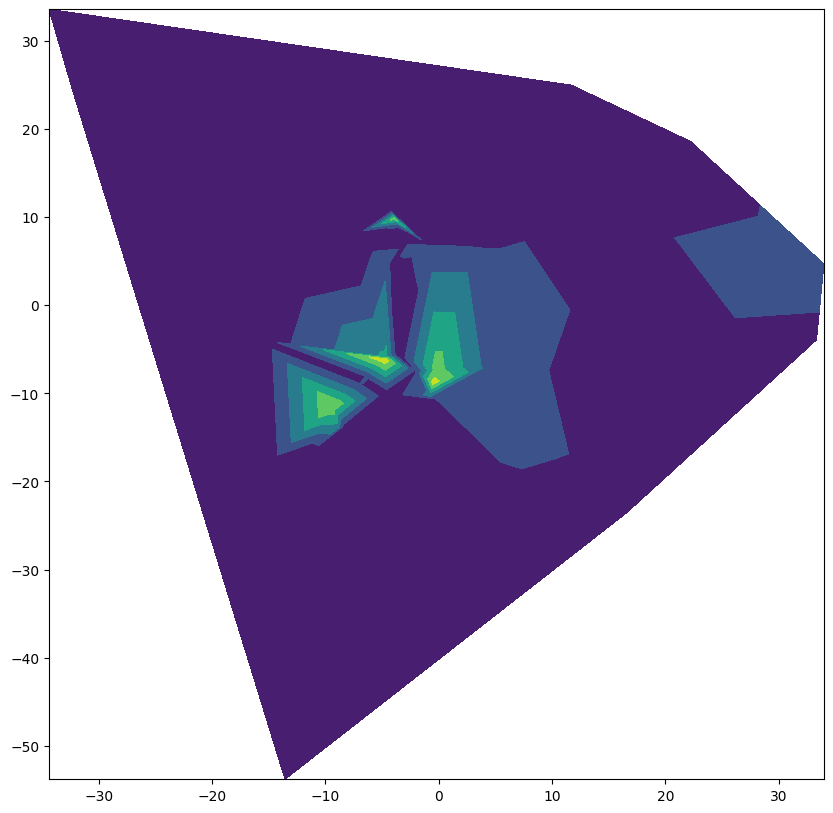

In [127]:
from scipy import interpolate
plt.figure(figsize=((10,10)))
plt.tricontourf(nx,ny,ndose)

In [121]:
(np.min(np.nonzero(map)))

0

c:\Users\sfs81547\OneDrive - Science and Technology Facilities Council\Documents\ISIS\Diamon Project\Code\venv\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,12 m=90 fp=nan s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


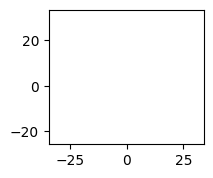

In [ ]:
from scipy.interpolate import interp2d

# f will be a function with two arguments (x and y coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid 
# specified by those arguments
f = interp2d(nx,ny,ndose,kind="linear")

x_coords = np.arange(min(nx),max(nx)+1)
y_coords = np.arange(min(ny),max(ny)+1)
Z = f(x_coords,y_coords)

fig = plt.imshow(Z,
           extent=[min(nx),max(nx),min(ny),max(ny)],
           origin="lower")

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.scatter(nx,ny,400,facecolors='none')